In [ ]:
'''
0 ——————数据分析的价值——————
发现趋势，未来即价值
1 收益 = 流量 x 转化率 x 客单价
2 数据 -(数据分析)-> 预测能力 -(转化率提高)-> 收益 
3 数据 -> 行为决策 -> 商业收益

将 价值 与 指标 联系起来

例子
生产效率 * 生产批次 = 生产数量
假如生产数量是一定的，
那么需要估计，
是加大生产批次?还是加大生产效率?
增加这两个都需要成本 
比如引入更好的生产工艺 还是 购买更多生产设备
这就是决策带来的价值

1 ——————数据质量——————
A 数据格式
1 结构化 = 表(行，列)
2 半结构化 = html，xml，json
3 非结构化 = 文本，图片，音频，视频 

B 异常值处理
1 填充缺失值
2 删除缺失值所在行

C 特征工程
1 计算出现的频率次数
2 计算日期
3 预估某些 合成特征 的 潜在影响


2 ——————手动数据分析——————
<<<从解释性出发，提出假设，通过指标与结果的关联证明假设正确，得到因果性分析>>>
A 坐标转换 复杂关系 -> 线性
y = ab^x
ln y = ln a + x ln b

y = ax^b
ln y = ln a + b ln x


3 ——————机器学习数据分析——————
<<<从数据性质出发，并且方便参数计算>>>
A 编码 符号 -> 数值
apple -> 001
orange -> 010
banana -> 100

B 归一化 量级平等
1 最大最小值归一化 x = (x - min) / (max - min)
2 方差归一化 x = (x - mean) / std

C 输入的数据性质决定的不同任务类型

有标记（监督）- 数据前后无关 = 离散预测（分类）
有标记（监督）- 数据前后有关 = 连续预测（回归）

无标记（无监督）- 数据前后无关 = 同类之间的内在区别（聚类）
无标记（无监督）- 数据前后有关 = 异类之间的外在关联（强化学习，降维，关联分析）

'''

In [ ]:
''' 
通用流程
1 收集数据 
2 数据清洗  
3 可视化 (描述性分析 关联性分析)
4 构建模型并训练 评估模型
5 尝试解释模型为什么会出现这样的判断条件 (解释性分析 提出假设)
6 优化模型 或 验证假设
7 部署模型并使用 (预测性分析 因果性分析)
8 输出研究报告 展示改进将带来的商业价值(主要是给他人看)
9 监控并更新模型 查看你的预测是否实现
'''

In [ ]:
''' 
边界
基础假设 = 历史将在一段时间内重现(模式,趋势,关联性)
所以无法预测 黑天鹅 事件

'''

In [ ]:
''' 
1 描述 当下 (趋势 + 分布)
2 解释 解释 (趋势 + 分布) 的原因
3 预测 未来 (趋势 + 分布)
4 指导 当下面对某问题 该如何做
'''

In [ ]:
''' 
更高的视角
1 对客户 = 这是不是最佳的解决方案
2 对营收 = 能不能增加收入，降低成本
3 对企业 = 能不能可持续发展 不为了短期利益损害长期利益 
4 对产品 = 不能为了改进新产品就破坏了其他方面的体验

'''

1 加载数据

In [2]:
import pandas as pd
import numpy as np

In [4]:
# 加载数据
data = pd.read_csv("salaries.csv")
data.head()

C:\Users\15192\AppData\Local\Temp\ipykernel_23724\1842425733.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [5]:
# 数据描述
data.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [6]:
# 数据形状
data.shape

(148654, 12)

In [7]:
# 每一列数据类型
data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [8]:
# 列数据类型转换为 类别 类型
data["Year"] = data["Year"].astype("category")

In [9]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

Id                       0
EmployeeName             6
JobTitle                 4
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

In [10]:
# 缺失值填充为0
data['Benefits'] = data['Benefits'].fillna(0)

# 删除缺失值所在行
data = data.dropna(subset=['BasePay'])

In [11]:
# 数据筛选
# 均值
pay_mean = data['TotalPay'].mean()
print(pay_mean)
# 最值
pay_max = data['TotalPay'].max()
print(pay_max)

75057.85104799217
567595.43


In [12]:
# 条件筛选
row = data[data['Id'] == 1]
row

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,San Francisco,NaN


In [13]:
# 条件筛选
row = data[data['Id'] < 3]
row

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,NaN


In [14]:
# 返回所有数值类型的列，包括整数，浮点数
df = data.select_dtypes(include=np.number)
df.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,1,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,2,155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,3,212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,4,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,5,134401.60,9737.00,182234.59,0.0,326373.19,326373.19


2 归一化

In [15]:
import sklearn.preprocessing as preprocessing
# 最小-最大归一化
'''MinMaxScaler
 (原值 - 最小值) / (最大值 - 最小值)
数据压缩到0-1
处理后，

不改变分布
均值 != 0
标准差 !=1

最小值 = 0
最大值 = 1
'''
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) # 缩放器，目标值0-1之间
scale1 = minmax_scaler.fit_transform(df) # 缩放
scale1_df = pd.DataFrame(scale1, columns=df.columns) # array -> dataframe
scale1_df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.000000,148045.000000,1.480450e+05,148045.000000,148045.000000,148045.000000,148045.000000
mean,0.499093,0.208149,2.075108e-02,0.026285,0.196658,0.133182,0.166586
std,0.288918,0.133873,4.680412e-02,0.019692,0.177838,0.088716,0.110317
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.248976,0.105666,4.079437e-08,0.017333,0.000143,0.066131,0.080420
50%,0.497952,0.204023,4.079437e-08,0.019339,0.243125,0.127175,0.164188
75%,0.750997,0.296947,1.915589e-02,0.027751,0.347065,0.187687,0.235305
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [16]:
# 均值方差归一化
'''StandardScaler
(原值 - 均值) / 标准差
以0为中心重新分布
处理后，

改变分布
均值 = 0
标准差 = 1

最小值 != 0
最大值 != 1
'''
mean_std_scaler = preprocessing.StandardScaler() # 缩放器
scale2 = mean_std_scaler.fit_transform(df) # 缩放
scale2_df = pd.DataFrame(scale2, columns=df.columns) # array -> dataframe
scale2_df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,1.480450e+05,1.480450e+05,1.480450e+05,1.480450e+05,1.480450e+05,1.480450e+05,1.480450e+05
mean,-3.916396e-17,3.271343e-16,3.340456e-17,2.073386e-17,-2.219291e-16,-2.764515e-17,1.474408e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.727463e+00,-1.554829e+00,-4.433616e-01,-1.334783e+00,-1.105832e+00,-1.501222e+00,-1.510073e+00
25%,-8.657070e-01,-7.655241e-01,-4.433607e-01,-4.546012e-01,-1.105028e+00,-7.558024e-01,-7.810821e-01
50%,-3.950794e-03,-3.081994e-02,-4.433607e-01,-3.527030e-01,2.612901e-01,-6.770817e-02,-2.173906e-02
75%,8.718921e-01,6.632980e-01,-3.408227e-02,7.447356e-02,8.457554e-01,6.143702e-01,6.229290e-01
max,1.733742e+00,5.914944e+00,2.092235e+01,4.944697e+01,4.517281e+00,9.770712e+00,7.554763e+00


3 可视化

In [17]:
import seaborn as sns

<Axes: xlabel='TotalPay', ylabel='Count'>

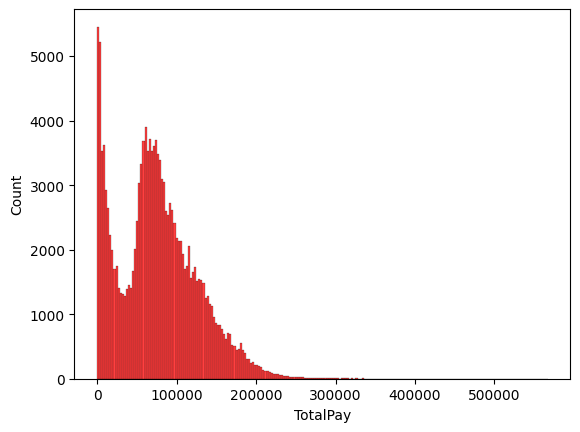

In [18]:
# 直方图
sns.histplot(data['TotalPay'],color='red')

<Axes: ylabel='TotalPay'>

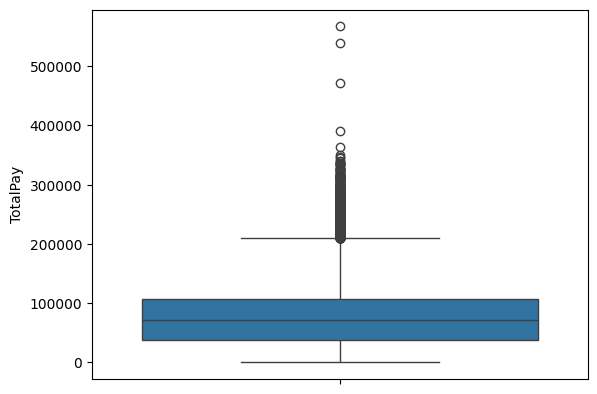

In [19]:
# 箱型图
sns.boxplot(y='TotalPay',data=data)

<Axes: xlabel='Status', ylabel='TotalPay'>

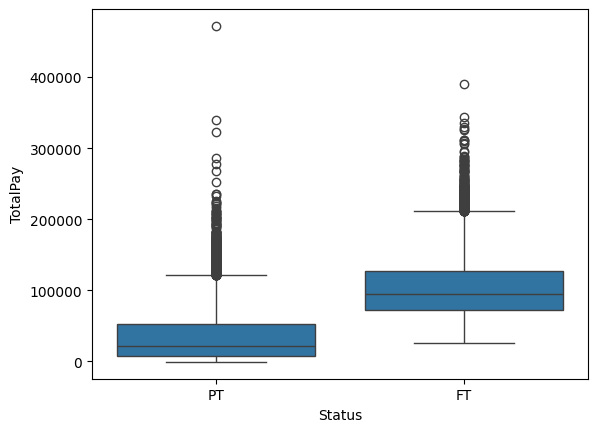

In [20]:
# 分类箱型图
# x是一个分类指标
sns.boxplot(x='Status',y='TotalPay',data=data)